In [1]:
from sklearn.datasets import fetch_openml

In [2]:
# Getting the set

In [3]:
mnist = fetch_openml('mnist_784',version=1)

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [5]:
X, y = mnist['data'], mnist['target']

In [6]:
X.shape

(70000, 784)

In [7]:
y.shape

(70000,)

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [9]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)

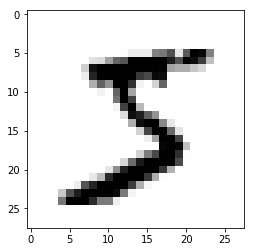

In [10]:
plt.imshow(some_digit_image,cmap='binary')
plt.show()

In [11]:
y[0]

'5'

In [12]:
import numpy as np
y = y.astype(np.uint8)

In [13]:
# Train set

In [14]:
X_train,X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [15]:
# Binary Classifier: just detect '5's

In [16]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [17]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [18]:
# We start with a Stochastic Gradient Descent Classifier

In [19]:
from sklearn.linear_model import SGDClassifier

In [20]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [21]:
sgd_clf.predict([some_digit])

array([ True])

In [22]:
## We will use k-fold validation (3 folds)

In [23]:
from sklearn.model_selection import cross_val_score

In [24]:
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [ ]:
## too good to be truth. We use a base estimator to compare

In [25]:
from sklearn.base import BaseEstimator

In [26]:
import numpy as np

class Never5Classifier(BaseEstimator):
    def fit(self,X,y=None):
        return self
    def predict(self,X):
        return np.zeros((len(X),1),dtype = bool)

In [27]:
never_5_clf = Never5Classifier()

In [28]:
cross_val_score(never_5_clf,X_train,y_train_5,cv = 3,scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

In [ ]:
## We want to check the predictions instead of the score

In [32]:
from sklearn.model_selection import cross_val_predict

In [33]:
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [90]:
from sklearn.metrics import confusion_matrix

In [35]:
confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [36]:
from sklearn.metrics import precision_score, recall_score

In [37]:
precision_score(y_train_5,y_train_pred)

0.8370879772350012

In [38]:
recall_score(y_train_5,y_train_pred)

0.6511713705958311

In [39]:
from sklearn.metrics import f1_score

In [40]:
f1_score(y_train_5,y_train_pred)

0.7325171197343846

In [41]:
## Precision/Recall Trade-Off

In [42]:
y_scores = sgd_clf.decision_function([some_digit])

In [43]:
y_scores

array([2164.22030239])

In [44]:
threshold = 0

In [45]:
y_some_digit_pred = (y_scores > threshold)

In [46]:
y_some_digit_pred

array([ True])

In [47]:
## We now raise the threshold

In [48]:
threshold = 8000

In [49]:
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [50]:
## Deiciding on the threshold

In [51]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,method='decision_function')

In [52]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [53]:
from sklearn.metrics import precision_recall_curve

In [54]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [55]:
len(precisions), len(recalls), len(thresholds)

(59967, 59967, 59966)

In [56]:
recalls[:-1]

array([1.00000000e+00, 9.99815532e-01, 9.99815532e-01, ...,
       5.53403431e-04, 3.68935621e-04, 1.84467810e-04])

In [57]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.figure(figsize = (10,5))
    plt.plot(thresholds,precisions[:-1],'b--',label= 'Precision')
    plt.plot(thresholds,recalls[:-1],'g-',label = 'Recalls')
    plt.grid(True)
    plt.legend()
    plt.xlim(-50000,50000)
    plt.show()
    

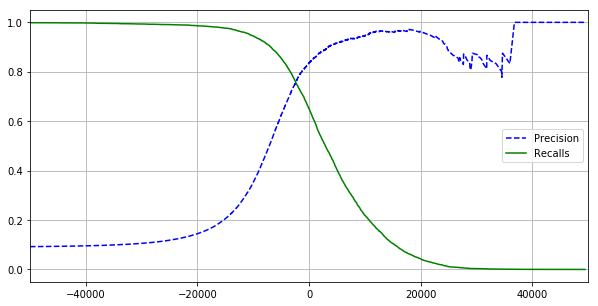

In [58]:
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)

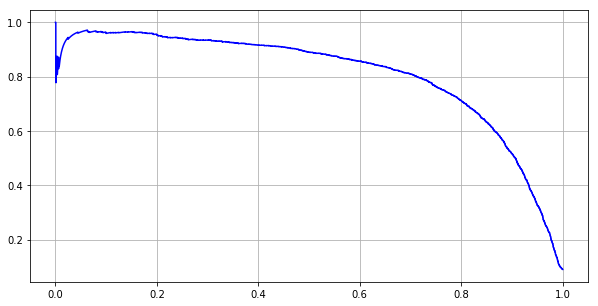

In [59]:
plt.figure(figsize = (10,5))
plt.plot(recalls[:-1],precisions[:-1],'b-')
plt.grid(True)
plt.show()

In [60]:
## Setting 90 precision classifier

In [61]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)] 

In [62]:
threshold_90_precision

3370.019499143957

In [63]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [64]:
precision_score(y_train_5,y_train_pred_90)

0.9000345901072293

In [65]:
recall_score(y_train_5,y_train_pred_90)

0.4799852425751706

In [66]:
# THE ROC CURVE

In [67]:
from sklearn.metrics import roc_curve

In [68]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

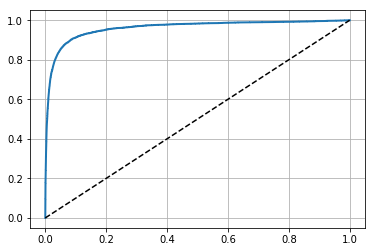

In [69]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth = 2,label = label)
    plt.plot([0,1],[0,1],'k--')
    plt.grid(True)
    
plot_roc_curve(fpr,tpr)
plt.show()

In [70]:
from sklearn.metrics import roc_auc_score

In [71]:
roc_auc_score(y_train_5,y_scores)

0.9604938554008616

In [125]:
# We now compare to a random forest classifier

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf,X_train,y_train_5,cv=3,
                                   method='predict_proba' )

/Users/aldodector/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/aldodector/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/aldodector/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [74]:
y_probas_forest

array([[0.1, 0.9],
       [1. , 0. ],
       [0.9, 0.1],
       ...,
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ]])

In [ ]:
# the positive class probability is:

In [75]:
y_scores_forest = y_probas_forest[:,1]

In [76]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

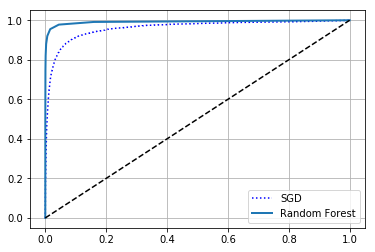

In [77]:
plt.plot(fpr,tpr,'b:',label='SGD')
plot_roc_curve(fpr_forest,tpr_forest,'Random Forest')
plt.legend(loc = 'lower right')
plt.show()

In [78]:
roc_auc_score(y_train_5,y_scores_forest)

0.9920527492698306

In [ ]:
## This is much better than sgd

In [ ]:
# Multiclass Classifiers

In [ ]:
## We try SVC

In [26]:
from sklearn.svm import SVC

In [ ]:
svm_clf = SVC(verbose=True)
svm_clf.fit(X_train,y_train)
svm_clf.predict([some_digit])

/Users/aldodector/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[LibSVM]

In [ ]:
## Takes for ever. Let's move on...

In [ ]:
# Let's check again SGD, now with the complete labels 

In [81]:
sgd_clf.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [82]:
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [83]:
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [84]:
cross_val_score(sgd_clf, X_train, y_train,cv=3,scoring='accuracy')

array([0.87082583, 0.87089354, 0.88628294])

In [ ]:
## We get over 87% acc. on all test folds.
## We scale the data now

In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
scaler = StandardScaler()

In [88]:
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train,cv=3,scoring='accuracy')

/Users/aldodector/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.89957009, 0.89344467, 0.89963495])

In [ ]:
# Error Analysis

In [89]:
y_train_pred = cross_val_predict(sgd_clf,X_train_scaled,y_train,cv=3)

/Users/aldodector/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [91]:
conf_mx = confusion_matrix(y_train,y_train_pred)

In [92]:
conf_mx

array([[5576,    0,   21,    6,    9,   43,   37,    6,  224,    1],
       [   0, 6398,   38,   23,    4,   44,    4,    8,  213,   10],
       [  26,   27, 5242,   90,   71,   26,   62,   36,  371,    7],
       [  24,   17,  117, 5220,    2,  208,   28,   40,  405,   70],
       [  12,   14,   48,   10, 5192,   10,   36,   26,  330,  164],
       [  28,   15,   33,  166,   55, 4437,   76,   14,  538,   59],
       [  30,   14,   41,    2,   43,   95, 5560,    4,  128,    1],
       [  21,    9,   52,   27,   51,   12,    3, 5693,  188,  209],
       [  17,   63,   46,   90,    3,  125,   25,   10, 5429,   43],
       [  23,   18,   31,   66,  116,   32,    1,  179,  377, 5106]])

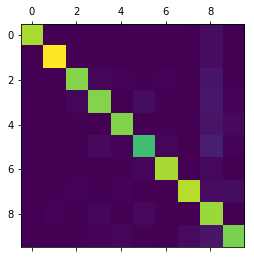

In [97]:
plt.matshow(conf_mx)
plt.show()

In [100]:
row_sums = conf_mx.sum(axis=1,keepdims = True)

In [101]:
norm_conf_mx = conf_mx / row_sums

In [103]:
np.fill_diagonal(norm_conf_mx,0)

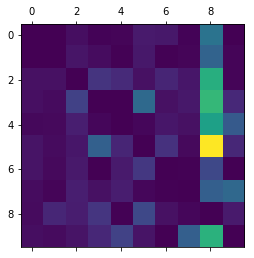

In [105]:
plt.matshow(norm_conf_mx)
plt.show()

In [ ]:
## many 5s are getting classified as 8s. Same proble for 3s and 5s.

In [ ]:
# Multilabel Classifiers

In [114]:
from sklearn.neighbors import KNeighborsClassifier

In [115]:
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large,y_train_odd]

In [116]:
y_multilabel

array([[False,  True],
       [False, False],
       [False, False],
       ...,
       [False,  True],
       [False, False],
       [ True, False]])

In [118]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [119]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [ ]:
## the model gets it right

In [ ]:
## We now select a metric. We compute F1 for each label and the compute the average score.

In [120]:
y_train_knn_pred = cross_val_predict(knn_clf,X_train,y_multilabel,cv = 3)

In [121]:
y_train_knn_pred

array([[False,  True],
       [False, False],
       [False, False],
       ...,
       [False,  True],
       [False, False],
       [ True, False]])

In [122]:
f1_score(y_multilabel,y_train_knn_pred,average='macro')

0.976410265560605

In [123]:
f1_score(y_multilabel,y_train_knn_pred,average='weighted')

0.9778357403921755

In [ ]:
# Multioutput Classifier

In [126]:
## We add noise to each instance. We want a clean image as output. Each output has the number
## of pixels as labels, and pixel intensity as different values within label. 

In [127]:
X_train.shape

(60000, 784)

In [128]:
noise = np.random.randint(0,100,(len(X_train),784))

In [129]:
X_train_mod = X_train + noise

In [131]:
noise = np.random.randint(0,100,(len(X_test),784))
X_test_mod = X_test + noise

In [132]:
y_train_mod = X_train
y_test_mod = X_test

In [133]:
some_digit_mod = X_test_mod[0]
some_digit_image_mod = some_digit_mod.reshape(28,28)

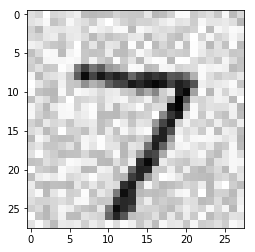

In [134]:
plt.imshow(some_digit_image_mod,cmap='binary')
plt.show()

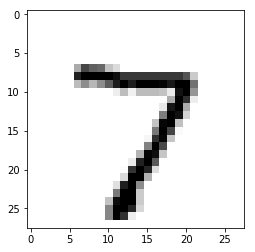

In [135]:
plt.imshow(y_test_mod[0].reshape(28,28),cmap='binary')
plt.show()

In [137]:
knn_clf.fit(X_train_mod,y_train_mod)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [138]:
some_digit_mod_clean = knn_clf.predict([some_digit_mod])

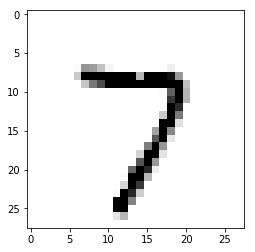

In [139]:
plt.imshow(some_digit_mod_clean.reshape(28,28),cmap='binary')
plt.show()